# 3 Итерационные методы решения линейных систем

## 3.4 Метод наискорейшего спуска и метод наименьших невязок

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

def solve(A, b, max_iter=100000, tol=1e-10, flag=0):
    '''
    Flag: 0 for steepest, 1 for nevyazki  
    '''
    x = np.zeros(len(b))
    nevyazki = []
    for i in range(max_iter):
        r = (A @ x) - b
        nevyazki.append(np.linalg.norm(r))
        if nevyazki[-1] < tol:
            break
        
        if flag == 0:
            tau = np.inner(r, r) / np.inner(A @ r, r)
        else:
            ar = A @ r
            tau = np.inner(r, ar) / np.inner(ar, ar)
        x -= tau * (A @ x - b)
    return x, np.array(nevyazki)

def check_solve_on_random_matrix(n=10, max_iter=10000, tol=1e-10, flag=0):
    A = np.random.rand(n, n)
    # такая матрица будет симметричной и неотрицательно определенной
    A = np.dot(A, A.transpose())
    x = np.random.rand(n) * 5
    b = A @ x

    start = perf_counter()
    x_calculated, nevyazki = solve(A, b, max_iter=max_iter, tol=tol, flag=flag)
    our_time = perf_counter() - start

    start = perf_counter()
    x_np = np.linalg.solve(A, b)
    np_time = perf_counter() - start

    if flag == 0:
        print("Метод наискорейшего спуска")
    else:
        print('Метод минимальных невязок')
    print(f'За {len(nevyazki)} итераций найдено решение с ошибкой {np.linalg.norm(x - x_calculated)} от \"точного\" решения')
    print(f'и ошибкой {np.linalg.norm(x_np - x_calculated)} от решения linalg.solve')
    print(f'Время работы нашего решения: {our_time}. Время работы linalg.solve: {np_time}')
    plt.plot(np.arange(len(nevyazki)), np.log(nevyazki))
    plt.xlabel('Число итераций')
    plt.ylabel('Логарифм невязки')
    plt.show()

Метод наискорейшего спуска
За 5142 итераций найдено решение с ошибкой 2.215859044217264e-09 от "точного" решения
и ошибкой 2.215915987565034e-09 от решения linalg.solve
Время работы нашего решения: 0.11509399999999914. Время работы linalg.solve: 3.5600000046542846e-05


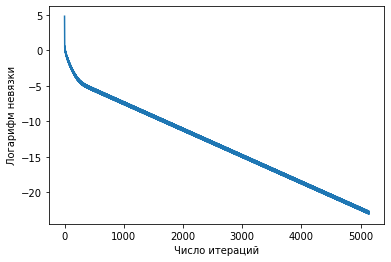

In [20]:
check_solve_on_random_matrix()

Метод минимальных невязок
За 7715 итераций найдено решение с ошибкой 1.6981540903429313e-08 от "точного" решения
и ошибкой 1.6981174181600397e-08 от решения linalg.solve
Время работы нашего решения: 0.18147989999999936. Время работы linalg.solve: 3.46000000490676e-05


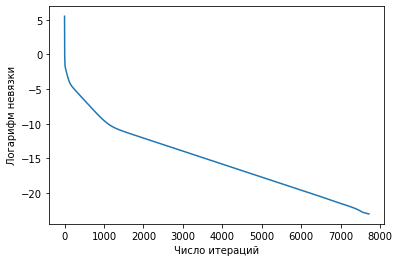

In [21]:
check_solve_on_random_matrix(flag=1)